# Projeto Nanodegree Evasão Escolar
### Introdução
Este projeto tem como objetivo desenvolver um modelo de Machine Learning capaz de prever a evasão de alunos em um curso online síncrono promovido pela PensComp. A previsão precoce da evasão possibilita a aplicação de estratégias de reengajamento.

O dataset contém 400 amostras de treino e 100 amostras de teste, cada uma com 36 atributos que capturam interações dos alunos. Vamos pré-processar os dados, explorar padrões, treinar múltiplos modelos de aprendizado de máquina, avaliar o desempenho, aplicar técnicas de IA explicável (XAI) para interpretar previsões e exportar o modelo final para uso em produção.

---

### Integrantes:
Bruno Pasquetti: 1134141

Gabriel Brocco: 

Pedro H. De Bortoli: 1129494

Rafael Augusto Klein: 1134873

## Manipulação e Exploração de Dados



## Etapa 1: Carregamento e Inspeção Inicial dos Dados

Nesta etapa inicial, realizamos o carregamento do conjunto de dados e uma exploração básica de sua estrutura. As ações realizadas incluem:

- **Importação de bibliotecas** essenciais para análise de dados e visualizações:
  - `pandas`: manipulação de tabelas (DataFrames)
  - `numpy`: suporte a operações numéricas
  - `matplotlib.pyplot` e `seaborn`: criação de gráficos

- **Leitura do dataset** com o `pd.read_csv()`, a partir da pasta `data`.

- **Visualização preliminar** com `df.head()` para inspecionar as primeiras linhas do conjunto de dados.

- **Resumo estrutural** com `df.info()` para verificar:
  - Tipos de dados de cada coluna
  - Quantidade de valores não nulos
  - Total de colunas e registros

- **Estatísticas descritivas** com `df.describe()` para obter:
  - Média, desvio padrão, valores mínimo e máximo, e quartis de cada variável numérica.

- **Análise de valores ausentes** com `df.isnull().sum()` para identificar colunas com dados faltantes, passo essencial para o tratamento posterior.

Essa inspeção inicial nos dá uma visão geral da qualidade e da composição do dataset, orientando as próximas etapas de limpeza e análise.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/dados_projeto_evasao_treino.csv")

df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

Unnamed: 0                                0
ds_cidade_usuario                        54
ts_primeiro_acesso                        0
ts_ultimo_acesso                          0
nr_dias_desde_primeiro_acesso             0
nr_dias_desde_ultimo_acesso               0
nr_atividades_sinalizadas                 0
nr_atividades_mapeadas                    0
nr_discussoes_forum_postadas              0
nr_questionarios_abandonados              0
nr_questionarios_finalizados              0
vl_medio_tempo_questionario             289
vl_medio_tempo_questionario_avaliado    293
vl_desempenho_questionario              373
nr_intervalos_uso                       191
nr_dias_uso                               0
vl_medio_atividade_diaria               191
vl_engajamento_usuario_por_intervalo    371
vl_engajamento_usuario_intradia         371
nr_interacoes_usuario                     0
nr_dias_engajamento_discussao             0
nr_dias_engajamento_questionario          0
nr_engajamento_discussao        

In [11]:
df 

,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,vl_medio_tempo_questionario,...,ds_cidade_usuario_Blumenau,ds_cidade_usuario_Campinas,ds_cidade_usuario_Curitiba,ds_cidade_usuario_Holambra,ds_cidade_usuario_São Paulo,ds_cidade_usuario_Uru,ds_cidade_usuario_brasilia,ds_cidade_usuario_campinas,ds_cidade_usuario_curitiba,ds_cidade_usuario_sao paulo
0,1970-01-01 00:00:00,1970-01-01 00:00:00,19612,19612,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False
1,1970-01-01 00:00:00,1970-01-01 00:00:00,19612,19612,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False
2,1970-01-01 00:00:00,1970-01-01 00:00:00,19612,19612,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False
3,2023-08-22 22:48:54,2023-09-05 15:40:54,20,6,0,4,0,0,1,111.0,...,False,False,False,False,False,False,False,False,False,False
4,1970-01-01 00:00:00,1970-01-01 00:00:00,19612,19612,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022-11-10 10:55:32,2022-11-10 12:26:16,305,305,0,0,0,0,1,2629.0,...,False,False,False,False,False,False,False,False,True,False
396,1970-01-01 00:00:00,1970-01-01 00:00:00,19612,19612,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False
397,2023-08-09 19:05:39,2023-08-09 19:06:40,33,33,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False
398,1970-01-01 00:00:00,1970-01-01 00:00:00,19612,19612,0,0,0,0,0,0.0,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Adicionar coluna 'evasao' fictícia ao dataset de treino (0 ou 1)
np.random.seed(42)
train_df['evasao'] = np.random.randint(0, 2, size=len(train_df))

In [ ]:
# Preencher valores ausentes
train_df.fillna(0, inplace=True)  # Substituir NaN por 0 em colunas numéricas
test_df.fillna(0, inplace=True)
train_df['ds_cidade_usuario'] = train_df['ds_cidade_usuario'].fillna('Desconhecido')
test_df['ds_cidade_usuario'] = test_df['ds_cidade_usuario'].fillna('Desconhecido')

# Verificar valores ausentes após tratamento
print("Valores ausentes no treino:", train_df.isnull().sum().sum())
print("Valores ausentes no teste:", test_df.isnull().sum().sum())


Valores ausentes no treino: 0
Valores ausentes no teste: 0


In [ ]:
# Converter timestamps para datetime
for df in [train_df, test_df]:
    df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s', errors='coerce')
    df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s', errors='coerce')

print('Descrição dos Dados de Treino:')
print(train_df.describe())

Descrição dos Dados de Treino:
                              ts_primeiro_acesso  \
count  400.000000                            400   
mean   248.027500  1997-05-28 05:04:05.067500032   
min      1.000000            1970-01-01 00:00:00   
25%    131.500000            1970-01-01 00:00:00   
50%    245.500000     2022-08-25 08:00:32.500000   
75%    367.250000            2023-08-22 23:32:55   
max    499.000000            2023-09-07 14:36:00   
std    140.580382                            NaN   

                    ts_ultimo_acesso  nr_dias_desde_primeiro_acesso  \
count                            400                     400.000000   
mean   1997-06-16 10:13:24.130000128                    9602.667500   
min              1970-01-01 00:00:00                       4.000000   
25%              1970-01-01 00:00:00                      20.000000   
50%              2022-10-18 11:39:32                     382.500000   
75%              2023-08-30 22:15:37                   19612.000000   
max

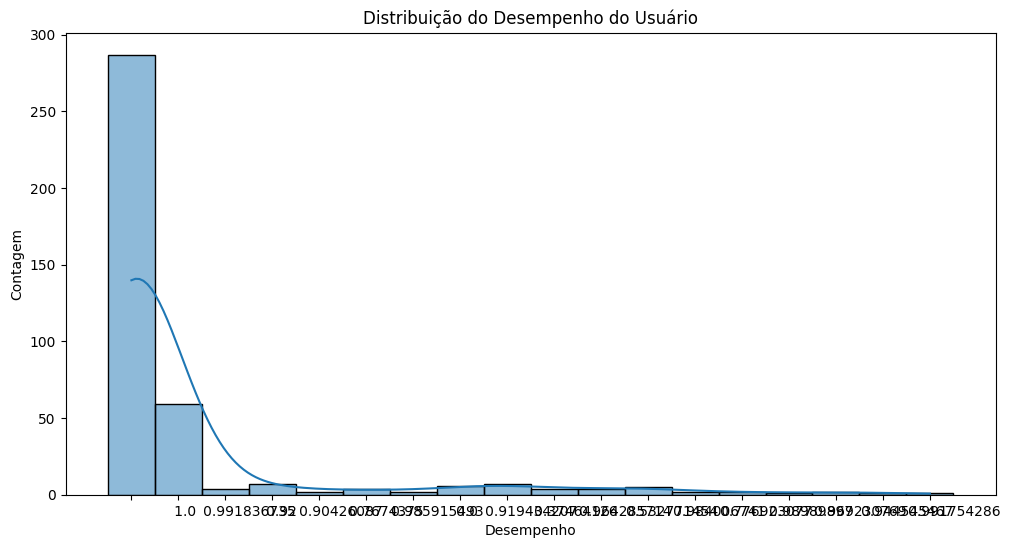

In [ ]:
# Histograma do Desempenho do Usuário
plt.figure(figsize=(12, 6))
sns.histplot(train_df['vl_desempenho_usuario'], bins=20, kde=True)
plt.title('Distribuição do Desempenho do Usuário')
plt.xlabel('Desempenho')
plt.ylabel('Contagem')
plt.show()

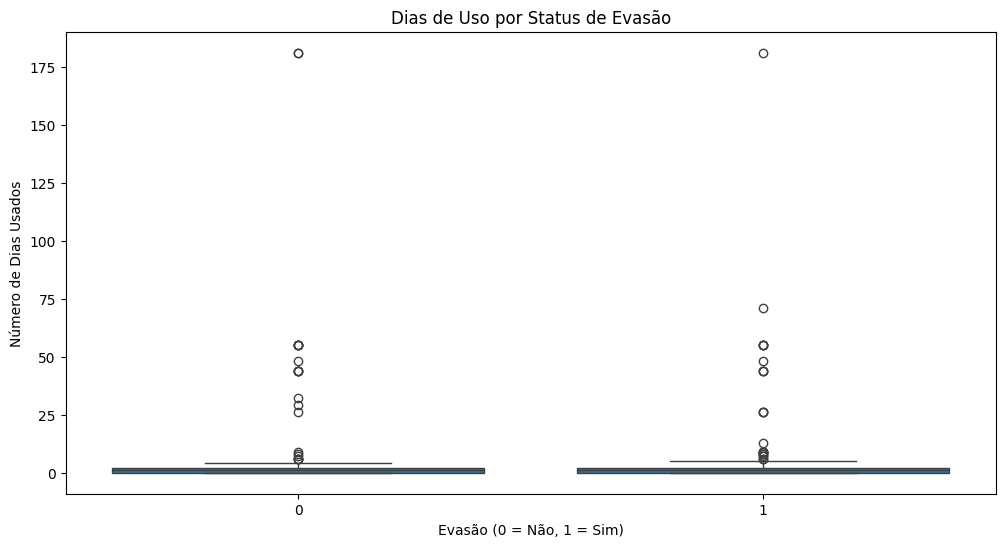

In [ ]:
# Boxplot de Dias de Uso por Status de Evasão
plt.figure(figsize=(12, 6))
sns.boxplot(x='evasao', y='nr_dias_uso', data=train_df)
plt.title('Dias de Uso por Status de Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Número de Dias Usados')
plt.show()

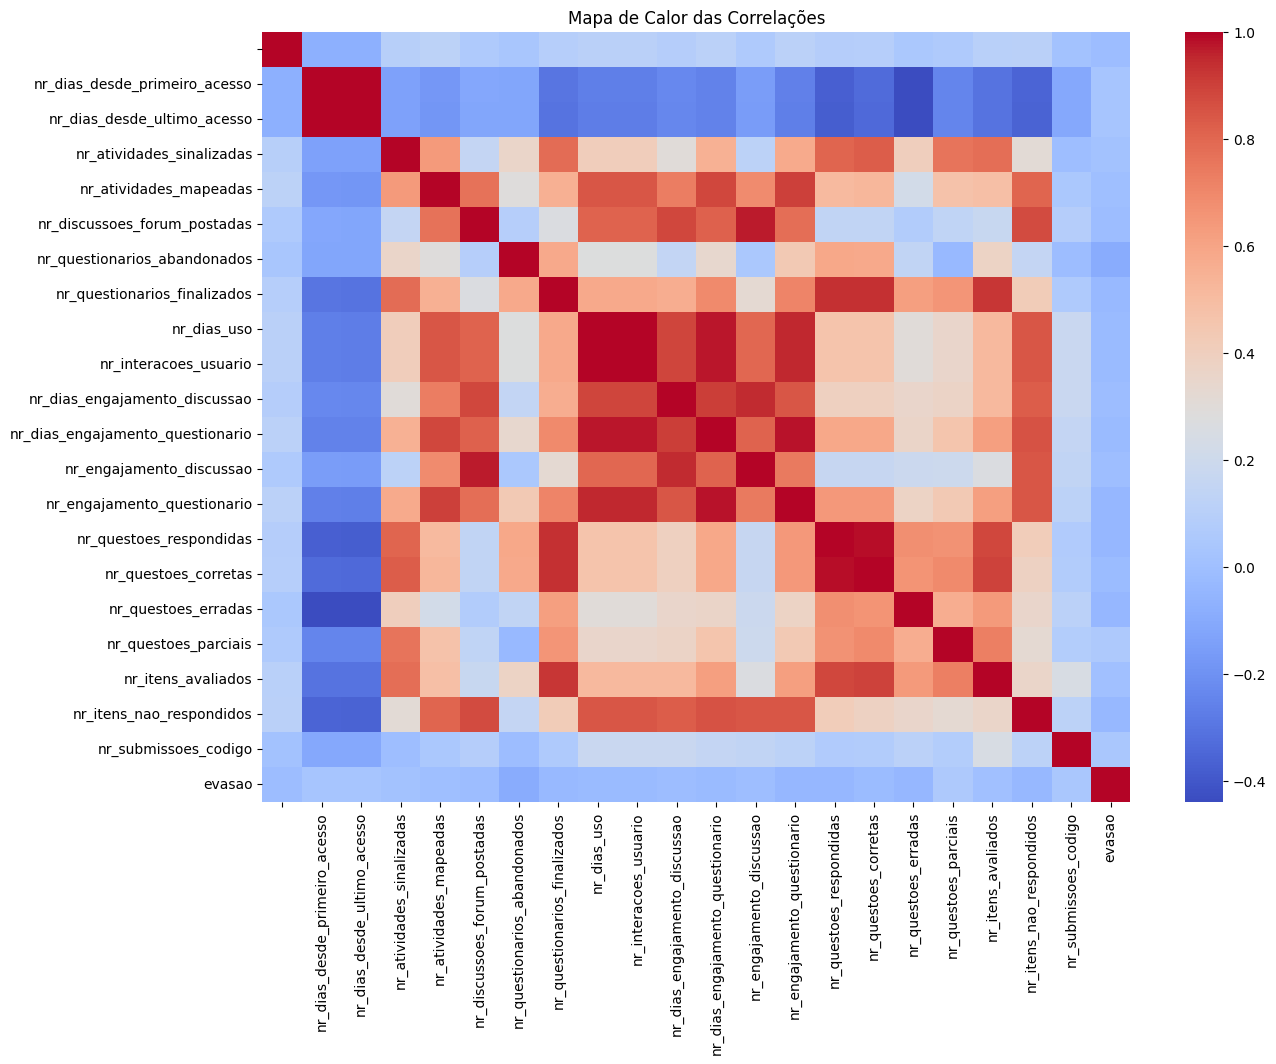

In [ ]:
# Mapa de Calor das Correlações (apenas colunas numéricas)
plt.figure(figsize=(14, 10))
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
sns.heatmap(train_df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Mapa de Calor das Correlações')
plt.show()